# 컴퓨터 비전을 위한 딥러닝

## 합성곱 신경망 소개

혼공 p437 참조


합성곱 신경망(Convolutional Neural Networks, CNN)은 이미지나 비디오 등의 공간적 구조를 가진 데이터를 처리하는 데 유용한 딥러닝 모델

- 입력 레이어: 원시 이미지 데이터를 받아들이는 첫 번째 레이어. 이미지는 보통 높이, 너비, 그리고 색상 채널(예: RGB)의 3차원 텐서로 표현.

- 합성곱 레이어(Convolutional Layer): 이 레이어는 이미지의 지역적 특성을 학습. 이 레이어에서는 "필터" 또는 "커널"이라는 작은 윈도우가 이미지를 스캔하며 이동. 각 필터는 고유한 특징(예: 가장자리, 텍스처 등)을 인식.

- 필터/커널: 합성곱 층에서 사용되는 작은 행렬로, 랜덤한 값으로 초기화된 후에 데이터를 통해 학습. 필터는 이미지의 여러 부분을 스캔하며 특정 특징을 인식.

- 스트라이드: 필터가 이미지 위를 이동하는 간격. 스트라이드 값에 따라 출력 피쳐 맵의 크기가 결정되며 큰 스트라이드는 작은 출력 차원을 생성하고, 작은 스트라이드는 큰 출력 차원을 생성.

- 패딩: 입력 이미지의 주위에 픽셀을 추가하는 방법으로, 합성곱이 적용된 후의 출력 크기를 조절할 수 있다. 패딩이 없으면 합성곱 연산을 거치면서 출력 이미지의 크기가 작아진다. 패딩을 사용하면 이를 방지하고 원본 이미지의 공간적 크기를 보존할 수 있다.

- 활성화 함수: 일반적으로 ReLU(Rectified Linear Unit) 같은 비선형 활성화 함수가 사용되어 복잡한 패턴을 학습할 수 있도록 한다.

- 풀링 레이어(Pooling Layer): 이 레이어는 출력을 다운샘플링하여 모델의 복잡도를 줄이고, 과적합을 방지하며, 일부 공간적 인식력을 보존. 가장 많이 사용되는 풀링 방법은 최대 풀링(Max Pooling)이다.

- 완전 연결 레이어(Fully Connected Layer): 이 레이어는 모든 입력 뉴런이 모든 출력 뉴런과 연결되어 있다. 이는 일반적으로 신경망의 마지막 단계에서 사용되며, 합성곱 및 풀링 레이어를 통해 학습된 고차원 특징을 이용하여 최종적으로 분류나 회귀 등의 작업을 수행.

- 이러한 각 요소들이 어떻게 함께 작동하는지 간단하게 설명하면, 합성곱 레이어의 필터는 입력 이미지를 스캔하면서 지역적인 특징을 감지하고, 이 정보를 활성화 맵(특징 맵)의 형태로 출력. 이때, 스트라이드와 패딩은 필터가 이미지를 어떻게 스캔할지를 결정하며, 활성화 함수는 비선형성을 추가하여 복잡한 패턴을 학습하게 해준다. 그 다음, 풀링 레이어는 이 특징 맵을 다운샘플링하여 모델의 복잡도를 줄이고, 공간적 인식력을 보존하며, 과적합을 방지한다. 마지막으로, 완전 연결 레이어는 이런 모든 특징들을 종합하여 최종적으로 이미지의 클래스를 예측하거나, 객체의 위치를 회귀하는 등의 작업을 수행한다.
이런 식으로, CNN은 각 레이어에서 이미지의 다양한 특징을 학습하고, 이 정보를 바탕으로 복잡한 패턴을 인식하고, 효과적인 예측을 수행하게 됩니다.

- 2D 합성곱 (Conv2D): 이는 가장 흔히 사용되는 합성곱 유형으로, 이미지 같은 2차원 데이터에 적용. Conv2D는 입력 데이터의 지역적 특징을 인식하고 이를 학습하는 데 사용.

- 1D 합성곱 (Conv1D): 이 유형의 합성곱은 시퀀스 데이터(예: 시계열 데이터, 텍스트 데이터)를 처리하는 데 주로 사용. 이는 입력 시퀀스의 연속적인 부분을 고려하므로, 특히 시간적인 순서 정보가 중요한 문제에 유용.

**간단한 컨브넷 만들기**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1)) # (28, 28, 1) 형태의 3차원 텐서를 입력
#  32개의 3x3 크기의 필터를 사용하는 합성곱 레이어를 정의하고, 입력 이미지에 적용
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # 텐서를 1차원으로 평탄화해서 모든 픽셀 값들을 연속적인 벡터 형태로 변환
# 출력 레이어로 완전 연결 레이어로, 10개의 뉴런을 가지며 각 뉴런은 이미지가 특정 클래스에 속할 확률을 출력
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**모델의 `summary()` 메서드 출력**

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**MNIST 이미지에서 컨브넷 훈련하기**

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 15s 4ms/step - loss: 0.1595 - accuracy: 0.9499
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0438 - accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0308 - accuracy: 0.9909
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0179 - accuracy: 0.9945


**컨브넷 평가하기**

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.9911
테스트 정확도: 0.991


### 합성곱 연산

#### 경계 문제와 패딩 이해하기

#### 합성곱 스트라이등 이해하기

### 최대 풀링 연산

**최대 풀링 층이 빠진 잘못된 구조의 컨브넷**

맥스 풀링을 하지 않을 경우 다음과 같은 문제가 발생할 수 있습니다:

- 과적합: 맥스 풀링은 이미지의 크기를 줄이고, 따라서 모델이 학습해야 하는 파라미터의 수를 줄입니다. 이는 모델의 복잡도를 낮추고, 과적합(overfitting)을 방지하는 데 도움이 됩니다. 맥스 풀링을 사용하지 않으면, 모델은 더 많은 파라미터를 가지게 되어 과적합의 위험이 커집니다.

- 계산 효율성 감소: 맥스 풀링을 통해 이미지 크기를 줄이면, 그 이후의 합성곱 레이어에서 처리해야 하는 데이터의 양이 줄어듭니다. 이는 계산 효율성을 향상시키는 데 도움이 됩니다. 맥스 풀링을 사용하지 않으면, 계산 비용이 크게 증가할 수 있습니다.

- 공간적 인변성 감소: 맥스 풀링은 이미지의 작은 변화, 예를 들어 객체의 위치 변화에 대해 모델이 덜 민감하게 만듭니다. 이는 객체가 이미지의 어느 위치에 있든지 간에 그 객체를 감지하는 데 도움이 됩니다. 맥스 풀링을 사용하지 않으면, 모델은 이런 작은 변화에 더 민감해지며, 이는 성능을 저하시킬 수 있습니다.

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

### 작은 데이터셋 문제에서 딥러닝의 타당성

### 데이터 내려받기

캐글에서 dogs-vs-cats 데이터셋을 다운로드하려면 캐글에 가입해야 한 후 생성한 API 키를 사용해야 합니다. 이런 과정이 번거롭다면 다음 명령으로 구글 드라이브에서 직접 다운로드할 수 있습니다.

```python
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')
```

그다음 아래 3개의 코드 셀을 건너 뛰고 바로 `unzip` 명령을 실행하세요.

In [ ]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:16<00:00, 52.5MB/s]


'dogs-vs-cats.zip'

In [ ]:
# kaggle.json 파일을 업로드하세요.
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haesunpark","key":"08f234c75bf1f9cff6991a8a6d5d49ac"}'}

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:04<00:00, 186MB/s]
100% 812M/812M [00:04<00:00, 174MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip # qq' 옵션은 'quiet' 모드로 unzip 명령어가 해제 과정의 세부 정보를 출력하지 않습니다.
!unzip -qq train.zip

In [ ]:
ls

dogs-vs-cats.zip  sampleSubmission.csv  train/
sample_data/      test1.zip             train.zip


**이미지를 훈련, 검증, 테스트 디렉토리로 복사하기**

In [ ]:
# 원본 이미지 데이터셋에서 일부 데이터를 추출하여 새로운 하위 데이터셋을 생성.
# 이 하위 데이터셋은 훈련, 검증, 테스트의 세 가지 부분으로 구성
import os, shutil, pathlib

original_dir = pathlib.Path("train") # 'train' 폴더를 원본 데이터셋의 디렉토리로 설정
new_base_dir = pathlib.Path("cats_vs_dogs_small") # 'cats_vs_dogs_small' 폴더를 새로운 데이터셋의 베이스 디렉토리로 설정

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"): # 각 카테고리에 대해 작업을 수행
        dir = new_base_dir / subset_name / category # 각 카테고리의 새로운 디렉토리 경로를 생성
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname) # 원본 디렉토리에서 해당 파일을 복사하여 새 디렉토리에 붙여넣기

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
!ls cats_vs_dogs_small/

test  train  validation


### 모델 만들기

**강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3)) # 높이와 너비가 각각 180 픽셀이며 3개의 채널(RGB)을 가진 이미지 입력
x = layers.Rescaling(1./255)(inputs) # 입력 이미지의 픽셀 값을 [0, 1] 범위로 재조정
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x) # 32개의 필터를 사용하며, 각 필터의 크기는 3x3
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**모델 훈련 설정하기**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### 데이터 전처리

**`image_dataset_from_directory`를 사용하여 이미지 읽기**

TensorFlow Keras의 image_dataset_from_directory 함수를 사용하여 디렉토리에 저장된 이미지 데이터로부터 데이터셋을 생성

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# 'new_base_dir / "train"' 경로에서 훈련 데이터셋을 생성.
# 여기서 각 이미지의 크기는 180x180으로 조정되며, 한 번에 32개의 이미지를 포함하는 배치(batch)가 생성
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16)) # 평균 0, 표준편차 1의 정규분포에서 랜덤하게 생성된 1000x16 크기의 2D 배열을 생성
dataset = tf.data.Dataset.from_tensor_slices(random_numbers) # Numpy 배열을 TensorFlow 데이터셋으로 변환

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**`Dataset`이 반환하는 데이터와 레이블 크기 확인하기**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


**`Dataset`을 사용해 모델 훈련하기**

In [ ]:
# ModelCheckpoint 콜백을 사용하여 훈련 도중에 모델을 저장
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 60ms/step - loss: 0.6954 - accuracy: 0.5140 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6958 - accuracy: 0.5360 - val_loss: 0.6760 - val_accuracy: 0.5480
Epoch 3/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6701 - accuracy: 0.5895 - val_loss: 0.6437 - val_accuracy: 0.6260
Epoch 4/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6476 - accuracy: 0.6255 - val_loss: 0.6306 - val_accuracy: 0.6440
Epoch 5/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6155 - accuracy: 0.6650 - val_loss: 0.6102 - val_accuracy: 0.6640
Epoch 6/30
63/63 [==============================] - 3s 44ms/step - loss: 0.5795 - accuracy: 0.7000 - val_loss: 0.6163 - val_accuracy: 0.6570
Epoch 7/30
63/63 [==============================] - 3s 45ms/step - loss: 0.5427 - accuracy: 0.7330 - val_loss: 0.5916 - val_accuracy: 0.6990
Epoch 8/30
63

**훈련 정확도와 손실 그래프 그리기**

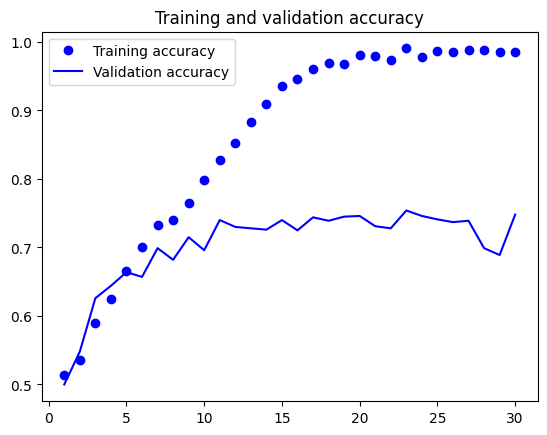

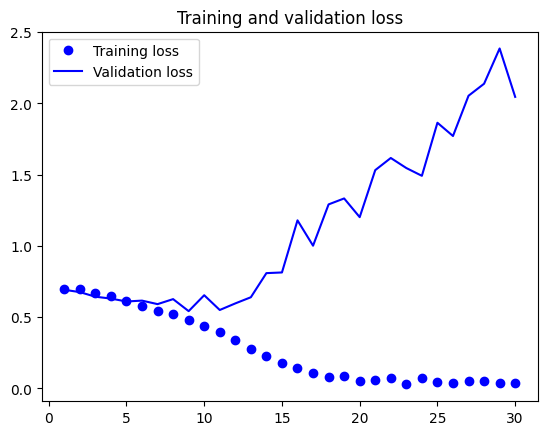

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**테스트 세트에서 모델 평가하기**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 1s 18ms/step - loss: 0.5637 - accuracy: 0.7215
테스트 정확도: 0.721


### 데이터 증식 사용하기

**컨브넷에 추가할 데이터 증식 단계 정의하기**

세 가지 데이터 증강 기법

- layers.RandomFlip("horizontal"): 이미지를 수평 방향으로 무작위로 뒤집습니다. 이는 이미지에 대한 모델의 위치 불변성을 증가시키는 데 도움이 됩니다.

- layers.RandomRotation(0.1): 이미지를 최대 0.1 라디안(약 5.7도) 범위에서 무작위로 회전시킵니다. 회전은 중심을 기준으로 하며, 빈 영역은 근접한 픽셀로 채워집니다.

- layers.RandomZoom(0.2): 이미지를 최대 20% 범위에서 무작위로 확대/축소합니다. 빈 영역은 근접한 픽셀로 채워집니다.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**랜덤하게 증식된 훈련 이미지 출력하기**

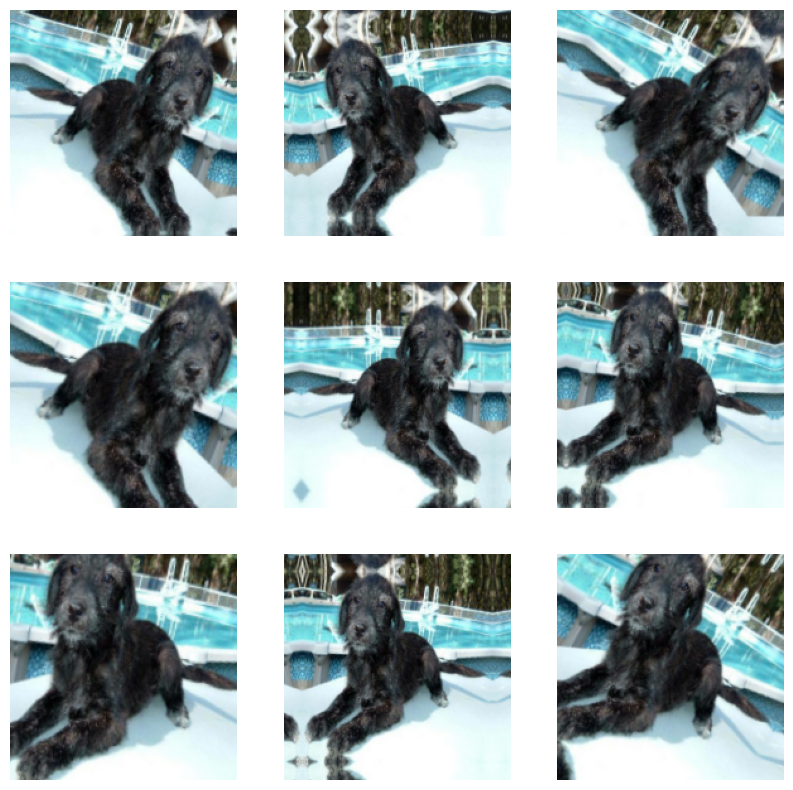

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**이미지 증식과 드롭아웃을 포함한 컨브넷 만들기**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**규제를 추가한 컨브넷 훈련하기**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 5s 51ms/step - loss: 0.7115 - accuracy: 0.4960 - val_loss: 0.6920 - val_accuracy: 0.6090
Epoch 2/100
63/63 [==============================] - 3s 47ms/step - loss: 0.6932 - accuracy: 0.5105 - val_loss: 0.6919 - val_accuracy: 0.5160
Epoch 3/100
63/63 [==============================] - 3s 48ms/step - loss: 0.6919 - accuracy: 0.5325 - val_loss: 0.6900 - val_accuracy: 0.5050
Epoch 4/100
63/63 [==============================] - 3s 47ms/step - loss: 0.6872 - accuracy: 0.5670 - val_loss: 0.6689 - val_accuracy: 0.5910
Epoch 5/100
63/63 [==============================] - 3s 50ms/step - loss: 0.6545 - accuracy: 0.6210 - val_loss: 0.6671 - val_accuracy: 0.5860
Epoch 6/100
63/63 [==============================] - 3s 48ms/step - loss: 0.6567 - accuracy: 0.6350 - val_loss: 0.6457 - val_accuracy: 0.6310
Epoch 7/100
63/63 [==============================] - 3s 47ms/step - loss: 0.6362 - accuracy: 0.6390 - val_loss: 0.5920 - val_accuracy: 0.6890
Epoch 

**테스트 세트에서 모델 훈련하기**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 3s 36ms/step - loss: 0.4682 - accuracy: 0.8315
테스트 정확도: 0.831


## 사전 훈련된 모델 활용하기

### 사전 훈련된 모델을 사용한 특성 추출

**VGG16 합성곱 기반 층 만들기**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### 데이터 증식을 사용하지 않는 빠른 특성 추출

**VGG16 특성과 해당 레이블 추출하기**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 25ms/step


In [ ]:
train_features.shape

(2000, 5, 5, 512)

**밀집 연결 분류기 정의하고 훈련하기**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 18.8357 - accuracy: 0.9310 - val_loss: 12.4233 - val_accuracy: 0.9160
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 3.5305 - accuracy: 0.9745 - val_loss: 3.3123 - val_accuracy: 0.9720
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 2.0476 - accuracy: 0.9845 - val_loss: 4.9244 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9414 - accuracy: 0.9900 - val_loss: 6.7497 - val_accuracy: 0.9710
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0989 - accuracy: 0.9900 - val_loss: 10.1257 - val_accuracy: 0.9590
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7547 - accuracy: 0.9900 - val_loss: 5.1521 - val_accuracy: 0.9790
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.9950 - val_loss: 16.6897 - val_accuracy: 0.9400
Epoch 8/20
63/63

**결과를 그래프로 나타내기**

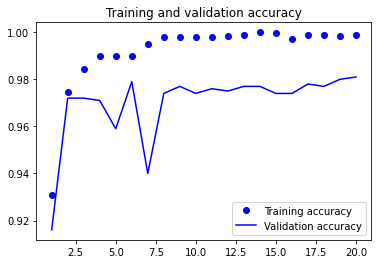

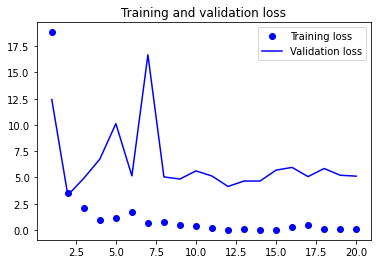

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 5.3572 - accuracy: 0.9705
테스트 정확도: 0.970


#### 데이터 증식을 사용한 특성 추출

**VGG16 합성곱 기반 층을 만들고 동결하기**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**동결하기 전과 후에 훈련 가능한 가중치 리스트를 출력하기**

In [ ]:
conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수: 26


In [ ]:
conv_base.trainable = False
print("합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수: 0


**데이터 증식 단계와 밀집 분류기를 합성곱 기반 층에 추가하기**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 14s 202ms/step - loss: 16.8770 - accuracy: 0.8920 - val_loss: 3.6804 - val_accuracy: 0.9720
Epoch 2/50
63/63 [==============================] - 13s 205ms/step - loss: 4.7586 - accuracy: 0.9575 - val_loss: 3.6411 - val_accuracy: 0.9720
Epoch 3/50
63/63 [==============================] - 13s 202ms/step - loss: 6.9902 - accuracy: 0.9475 - val_loss: 7.1186 - val_accuracy: 0.9570
Epoch 4/50
63/63 [==============================] - 13s 198ms/step - loss: 4.1640 - accuracy: 0.9665 - val_loss: 5.9981 - val_accuracy: 0.9630
Epoch 5/50
63/63 [==============================] - 13s 201ms/step - loss: 4.0658 - accuracy: 0.9595 - val_loss: 2.9750 - val_accuracy: 0.9810
Epoch 6/50
63/63 [==============================] - 13s 198ms/step - loss: 3.3065 - accuracy: 0.9645 - val_loss: 3.9064 - val_accuracy: 0.9730
Epoch 7/50
63/63 [==============================] - 13s 197ms/step - loss: 2.9704 - accuracy: 0.9715 - val_loss: 6.0621 - val_accuracy: 0.960

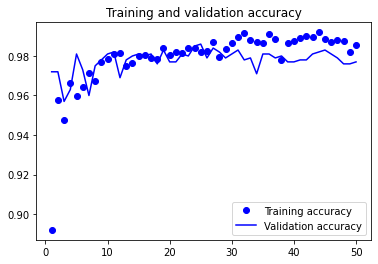

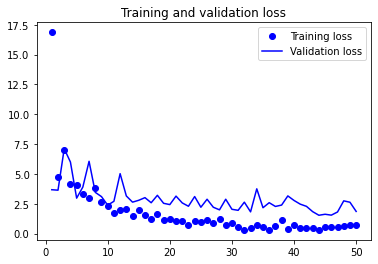

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**테스트 세트에서 모델 평가하기**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 8s 114ms/step - loss: 2.4575 - accuracy: 0.9765
테스트 정확도: 0.976


### 사전 훈련된 모델 미세 조정하기

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**마지막에서 네 번째 층까지 모든 층 동결하기**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**모델 미세 조정하기**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 228ms/step - loss: 0.4330 - accuracy: 0.9905 - val_loss: 1.6960 - val_accuracy: 0.9820
Epoch 2/30
63/63 [==============================] - 14s 221ms/step - loss: 0.3498 - accuracy: 0.9915 - val_loss: 1.5210 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 14s 221ms/step - loss: 0.4870 - accuracy: 0.9925 - val_loss: 1.1473 - val_accuracy: 0.9850
Epoch 4/30
63/63 [==============================] - 14s 219ms/step - loss: 0.3000 - accuracy: 0.9940 - val_loss: 1.3070 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 14s 218ms/step - loss: 0.4618 - accuracy: 0.9900 - val_loss: 1.3919 - val_accuracy: 0.9820
Epoch 6/30
63/63 [==============================] - 14s 220ms/step - loss: 0.2962 - accuracy: 0.9940 - val_loss: 1.7083 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 14s 216ms/step - loss: 0.2111 - accuracy: 0.9935 - val_loss: 1.5046 - val_accuracy: 0.9840

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 8s 115ms/step - loss: 1.4822 - accuracy: 0.9795
테스트 정확도: 0.979


## 요약